In [ ]:
%pip install qiskit-aer
%pip install seaborn
%pip install pylatexenc


In [13]:
import numpy as np
from quam_libs.components import QuAM, TransmonPair
from quam_libs.experiments.two_qubit_xeb import (
    XEBConfig,
    XEB,
    backend as fake_backend,
    QUAGate,
)

machine = QuAM.load()
qubits = machine.active_qubits
# Get the relevant QuAM components
readout_qubit_indices = [0]  # Indices of the target qubits
readout_qubits = [qubits[i] for i in readout_qubit_indices]
target_qubit_indices = [0]  # Indices of the target qubits
target_qubits = [qubits[i] for i in target_qubit_indices]
target_qubit_pairs = [
    qubit_pair
    for qubit_pair in machine.active_qubit_pairs
    if qubit_pair.qubit_control in target_qubits and qubit_pair.qubit_target in target_qubits
]

print("target_qubits: %s" %[q.name for q in target_qubits]) 


def cz_gate(qubit_pair: TransmonPair):
    """
    CZ gate QUA macro: Add your own QUA code here implementing your CZ gate for any given qubit pair
    :param qubit_pair: TransmonPair instance on which to apply the gate
    :return: None
    """

    pass


cz_qua = QUAGate("cz", cz_gate)

xeb_config = XEBConfig(
    seqs=9, #81,
    # depths=np.arange(1, 1200, 24),
    depths=np.arange(1, 55, 5),
    n_shots=700, #1000,
    readout_qubits=readout_qubits, 
    qubits=target_qubits,
    qubit_pairs=target_qubit_pairs,
    baseline_gate_name="x90",
    gate_set_choice="sw",
    two_qb_gate=None, #cz_qua,
    save_dir="",
    should_save_data=False, #True,
    generate_new_data=True,
    disjoint_processing=False, #False,
    # reset_method="active",
    # reset_kwargs={"max_tries": 3, "pi_pulse": "x180"},
    reset_method="cooldown", #"active",
    reset_kwargs={"cooldown_time": 100000, "max_tries": 3, "pi_pulse": "x180"},
)

simulate = False  # Set to True to simulate the experiment with Qiskit Aer instead of running it on the QPU
xeb = XEB(xeb_config, quam=machine)
if simulate:
    job = xeb.simulate(backend=fake_backend)
else:
    job = xeb.run(simulate=False)  # If simulate is False, job is run on the QPU, else pulse output is simulated

# 87 * 500/12 * 1000 = 13m 26.8s 
# 87 * 1200/24 * 700 = 22m 42.3s


target_qubits: ['q1']
2024-11-09 22:51:41,580 - qm - INFO     - Performing health check
2024-11-09 22:51:41,592 - qm - INFO     - Cluster healthcheck completed successfully.


/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:53: UserWarning: No qubit pairs provided. The experiment will run with single qubit gates only.
  warn("No qubit pairs provided. The experiment will run with single qubit gates only.")


2024-11-09 22:51:43,754 - qm - INFO     - Adding program to queue.


In [ ]:
job.circuits[7][3].draw("mpl") # job.circuits[seq][depth] 

In [ ]:
job.circuits[7][9].draw("mpl") # job.circuits[seq][depth]

/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:682: RuntimeWarning: invalid value encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:682: RuntimeWarning: divide by zero encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:734: RuntimeWarning: invalid value encountered in scalar divide
  fid_lsq = df["numerator"].sum() / df["denominator"].sum()


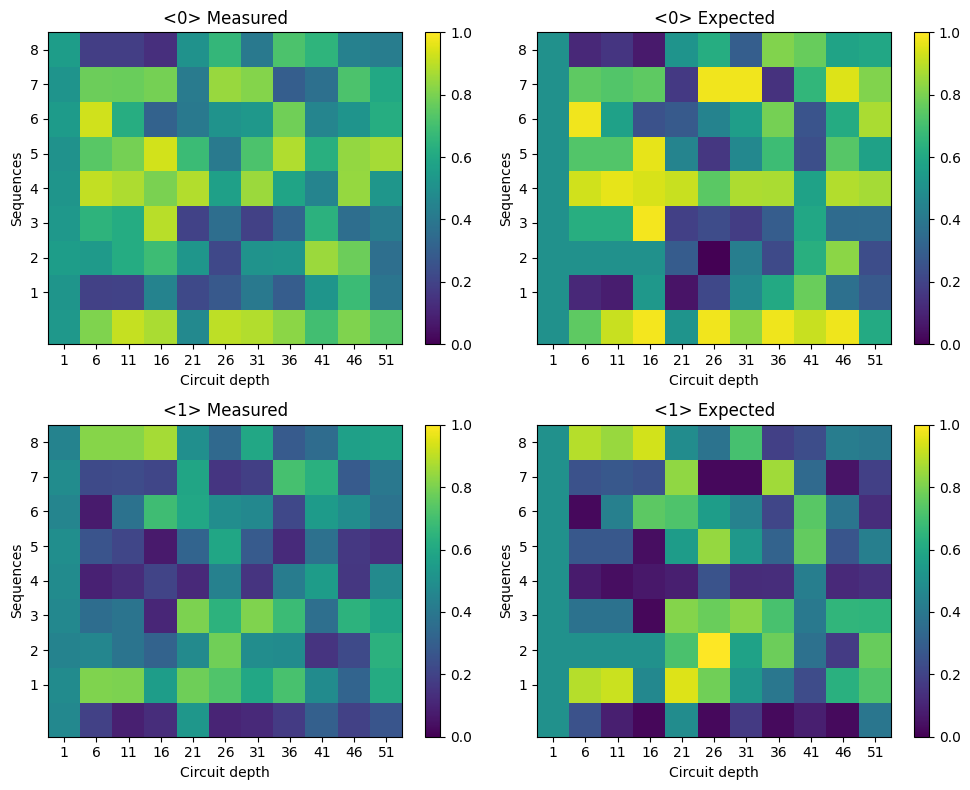

In [14]:
# 1. Extracting Outputs from QPU (QUA, Measured) 
# 2. Extracting recorded Circuits and perform ideal simulation accordingly on CPU (Expected): 
result = job.result()
result.plot_state_heatmap()

/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:919: RuntimeWarning: invalid value encountered in scalar divide
  fid_lsq = df["numerator"].sum() / df["denominator"].sum()
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:869: RuntimeWarning: Mean of empty slice
  Fxeb = np.nanmean(self.log_fidelities, axis=0)


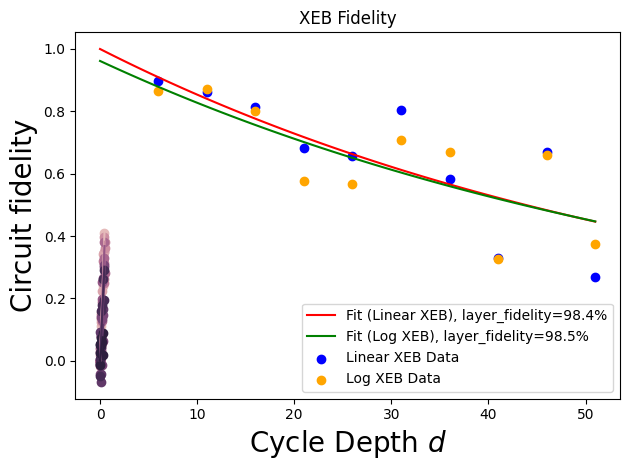

In [15]:
# Compute Fidelities:  
result.plot_records()
result.plot_fidelities()

In [16]:
# Debugging:  
print(xeb.xeb_config.qubit_pairs)

print("['counts']['0']: ")
print(result.saved_data['counts']['0'])

print("['counts']['1']: ")
print(result.saved_data['counts']['1'])


[]
['counts']['0']: 
[[372 565 638 611 329 629 619 577 489 565 515]
 [366 134 137 313 154 194 282 204 365 477 273]
 [388 378 431 479 367 153 360 366 596 542 254]
 [374 452 430 626 138 249 135 222 446 249 292]
 [366 636 614 559 619 394 596 410 315 588 367]
 [358 519 554 651 477 286 503 616 442 586 607]
 [381 649 436 218 282 359 372 547 319 363 433]
 [362 544 539 555 289 591 569 207 255 503 419]
 [388 127 126  95 353 464 284 502 455 306 295]]
['counts']['1']: 
[[328 135  62  89 371  71  81 123 211 135 185]
 [334 566 563 387 546 506 418 496 335 223 427]
 [312 322 269 221 333 547 340 334 104 158 446]
 [326 248 270  74 562 451 565 478 254 451 408]
 [334  64  86 141  81 306 104 290 385 112 333]
 [342 181 146  49 223 414 197  84 258 114  93]
 [319  51 264 482 418 341 328 153 381 337 267]
 [338 156 161 145 411 109 131 493 445 197 281]
 [312 573 574 605 347 236 416 198 245 394 405]]
